In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
from matplotlib.dates import DayLocator
from matplotlib.dates import WeekdayLocator

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('./data/train.csv', parse_dates=['datetime'], index_col=['datetime'])

In [4]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.index.max()

Timestamp('2012-12-19 23:00:00')

In [157]:
df.shape

(10886, 11)

In [158]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Resampling

In [203]:
df1 = df[['casual','registered','count']].resample('D').sum()
df2 = df[['season','workingday','holiday','weather']].resample('D').first()
df3 = df[['temp','atemp','humidity','windspeed']].resample('D').mean()
df_daily = pd.concat([df1,df2,df3],axis=1)
df_daily.head()

,casual,registered,count,season,workingday,holiday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,,,,
2011-01-01,331,654,985,1.0,0.0,0.0,1.0,14.110833,18.181250,80.583333,10.749871
2011-01-02,131,670,801,1.0,0.0,0.0,2.0,14.902609,17.686957,69.608696,16.652122
2011-01-03,120,1229,1349,1.0,1.0,0.0,1.0,8.050909,9.470227,43.727273,16.636709
2011-01-04,108,1454,1562,1.0,1.0,0.0,1.0,8.200000,10.606087,59.043478,10.739809
2011-01-05,82,1518,1600,1.0,1.0,0.0,1.0,9.305217,11.463478,43.695652,12.522300


In [207]:
df1 = df[['casual','registered','count']].resample('M', convention='end').sum()
df2 = df[['season','workingday','holiday','weather']].resample('M', convention='end').first()
df3 = df[['temp','atemp','humidity','windspeed']].resample('M', convention='end').mean()
df_monthly = pd.concat([df1,df2,df3],axis=1)
df_monthly.head()

,casual,registered,count,season,workingday,holiday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,,,,
2011-01-31,2008,21544,23552,1,0,0,1,8.633782,10.767981,56.308585,13.749830
2011-02-28,3776,29068,32844,1,1,0,2,11.331076,13.999922,53.580717,15.509298
2011-03-31,7910,30825,38735,1,1,0,1,14.063184,16.895594,55.923767,16.033866
2011-04-30,12229,38288,50517,2,1,0,3,17.776879,21.239835,66.285714,15.844234
2011-05-31,15865,63848,79713,2,0,0,1,21.528596,25.455143,71.421053,12.355358


## Plotting counts per hour of 1 day

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

plt.style.use('seaborn')

df = pd.read_csv('./data/train.csv', parse_dates=['datetime'], index_col=['datetime'])

In [29]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [22]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.day
df['hour'] = df.index.hour

In [25]:
df_day = df.resample('D').first()

In [26]:
df_day.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
datetime,,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0,2011.0,1.0,1.0,0.0
2011-01-02,1.0,0.0,0.0,2.0,18.86,22.725,88.0,19.9995,4.0,13.0,17.0,2011.0,1.0,2.0,0.0
2011-01-03,1.0,0.0,1.0,1.0,9.02,9.850,44.0,23.9994,0.0,5.0,5.0,2011.0,1.0,3.0,0.0
2011-01-04,1.0,0.0,1.0,1.0,6.56,9.090,55.0,7.0015,0.0,5.0,5.0,2011.0,1.0,4.0,0.0
2011-01-05,1.0,0.0,1.0,1.0,8.20,12.880,64.0,0.0000,0.0,6.0,6.0,2011.0,1.0,5.0,0.0


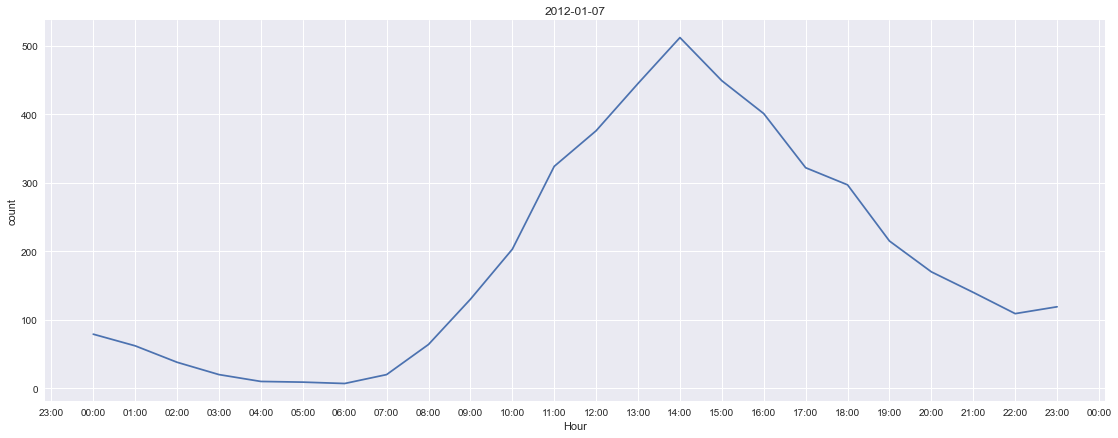

In [31]:
plt.figure(figsize=(19,7))

#data = df.loc['2012-01-01':'2012-12-31']
date = '2012-01-07'
data = df.loc[date]

ax = sns.lineplot(x=data.index,y='count', data=data)

# Define the date format
date_form = DateFormatter("%H:%M")
date_loc = HourLocator()
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(date_loc)
ax.set_xlabel('Hour')
ax.set_title(date)

plt.savefig('./output/' + date + '.jpg')

## Plotting counts per day of 1 week

Text(0.5, 1.0, '2012-01-18 - 2012-01-25')

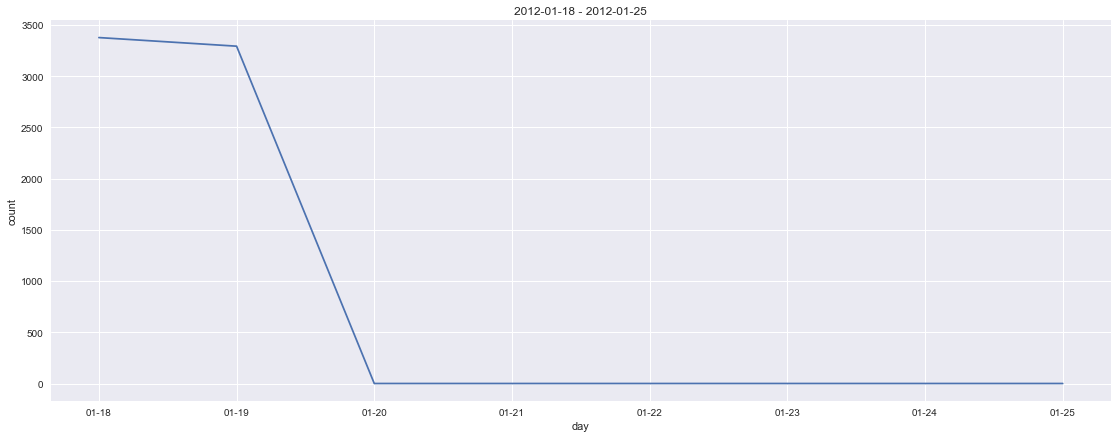

In [167]:
plt.figure(figsize=(19,7))

date_start = '2012-01-18'
date_end = '2012-01-25'
data = df.resample('D').sum().loc[date_start:date_end]

ax = sns.lineplot(x=data.index,y='count', data=data)

# Define the date format
date_form = DateFormatter("%m-%d")
date_loc = DayLocator()
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(date_loc)
ax.set_xlabel('day')
ax.set_title(date_start + ' - ' + date_end)

## Plotting counts per day of 1 month

Text(0.5, 1.0, '2012-04-01 - 2012-04-27')

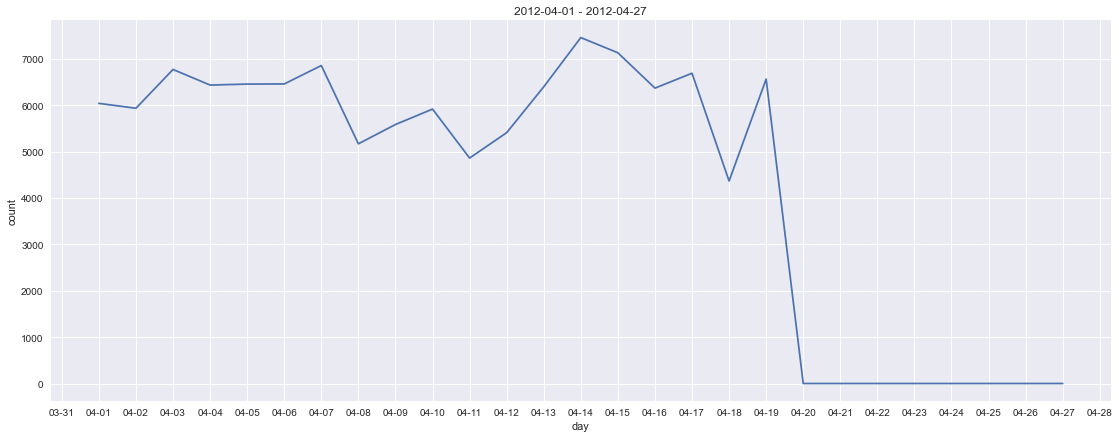

In [237]:
plt.figure(figsize=(19,7))

#data = df.loc['2012-01-01':'2012-12-31']
date_start = '2012-04-01'
date_end = '2012-04-27'
data = df.resample('D').sum().loc[date_start:date_end]

ax = sns.lineplot(x=data.index,y='count', data=data)

# Define the date format
date_form = DateFormatter("%m-%d")
date_loc = DayLocator()
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(date_loc)
ax.set_xlabel('day')
ax.set_title(date_start + ' - ' + date_end)

## Plotting counts per week of 1 year

Text(0.5, 1.0, '2012-01-01 - 2012-12-31')

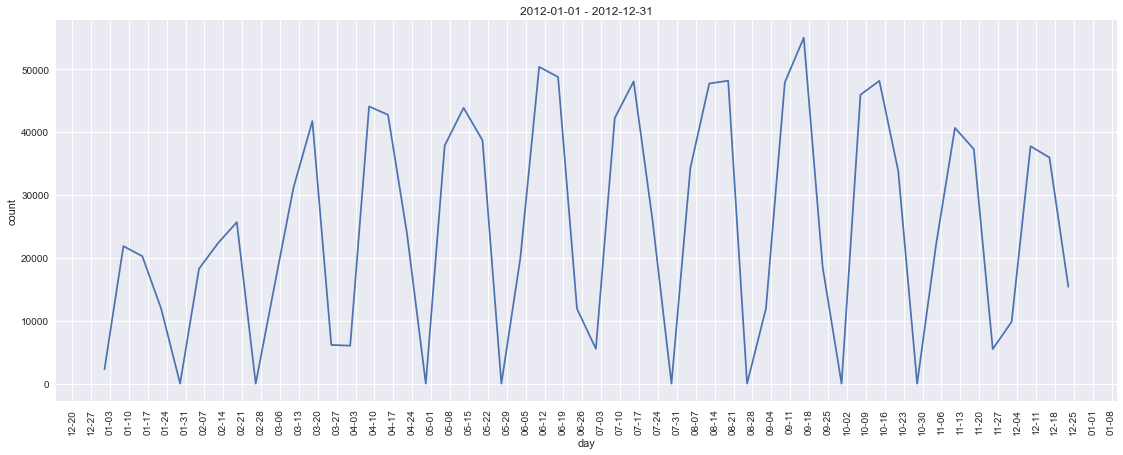

In [189]:
plt.figure(figsize=(19,7))

date_start = '2012-01-01'
date_end = '2012-12-31'
data = df.resample('W').sum().loc[date_start:date_end]

sns.lineplot(x=data.index,y='count', data=data)

ax = plt.gca()

# Define the date format
date_form = DateFormatter("%m-%d")
date_loc = WeekdayLocator()
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(date_loc)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('day')
ax.set_title(date_start + ' - ' + date_end)

<AxesSubplot:xlabel='weather', ylabel='count'>

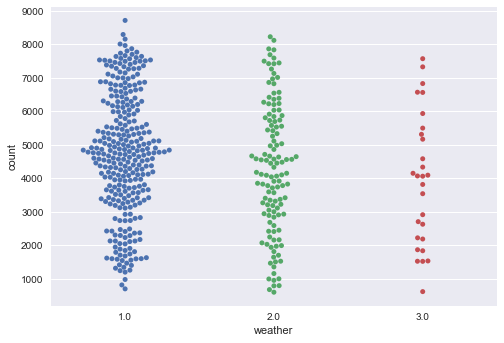

In [216]:
sns.swarmplot(data=df_daily, x='weather', y='count')

<AxesSubplot:xlabel=' ', ylabel='count'>

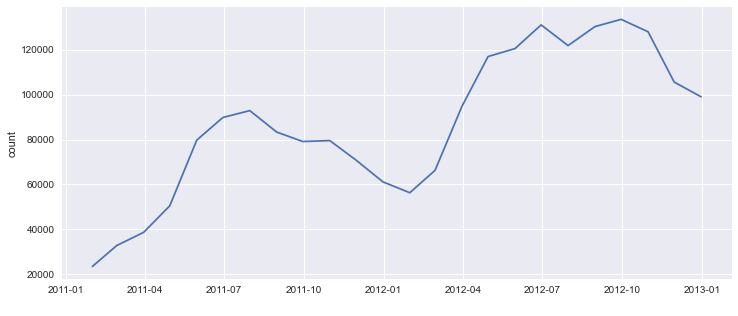

In [45]:
plt.figure(figsize=(12,5))

x = df.resample('M').sum()['count'].index
y = df.resample('M').sum()['count']

plt.xlabel(' ')

sns.lineplot(x=x, y=y)

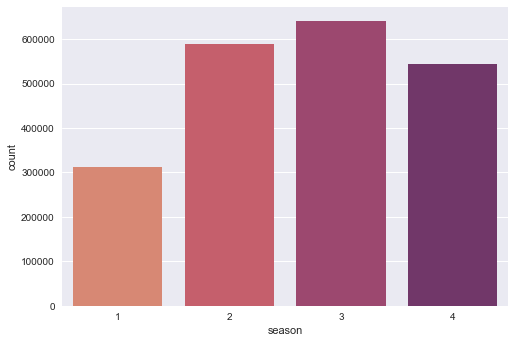

In [75]:
x = df.groupby('season')['count'].sum().index
y = df.groupby('season')['count'].sum()

sns.barplot(x=x, y=y, palette='flare')

plt.savefig('./output/season_count.jpg')

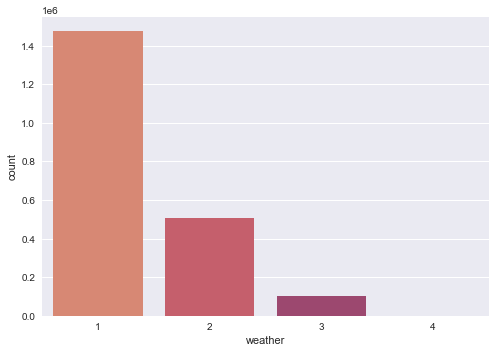

In [76]:
x = df.groupby('weather')['count'].sum().index
y = df.groupby('weather')['count'].sum()

sns.barplot(x=x, y=y, palette='flare')

plt.savefig('./output/weather_count.jpg')

<AxesSubplot:xlabel='workingday', ylabel='count'>

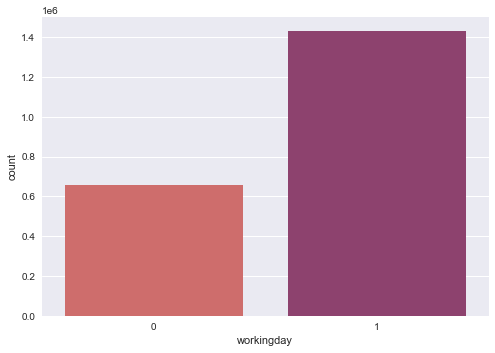

In [73]:
x = df.groupby('workingday')['count'].sum().index
y = df.groupby('workingday')['count'].sum()

sns.barplot(x=x, y=y, palette='flare')

<AxesSubplot:xlabel='holiday', ylabel='count'>

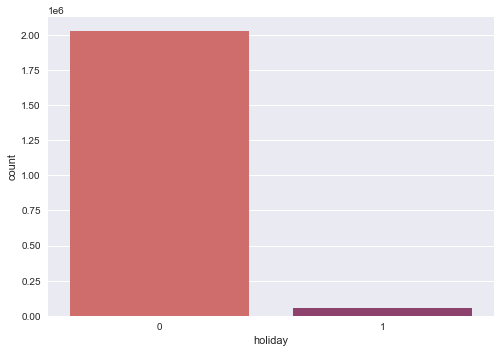

In [74]:
x = df.groupby('holiday')['count'].sum().index
y = df.groupby('holiday')['count'].sum()

sns.barplot(x=x, y=y, palette='flare')

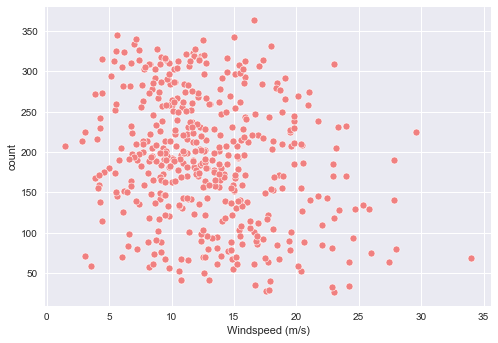

In [77]:
x = df.resample('D').mean()['windspeed']
y = df.resample('D').mean()['count']

sns.scatterplot(x=x, y=y, color='lightcoral')

plt.xlabel('Windspeed (m/s)')

plt.savefig('./output/windspeed_count.jpg')

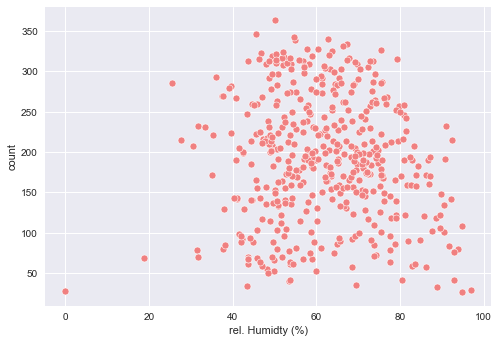

In [78]:
x = df.resample('D').mean()['humidity']
y = df.resample('D').mean()['count']

sns.scatterplot(x=x, y=y, color='lightcoral')

plt.xlabel('rel. Humidty (%)')

plt.savefig('./output/humidity_count.jpg')

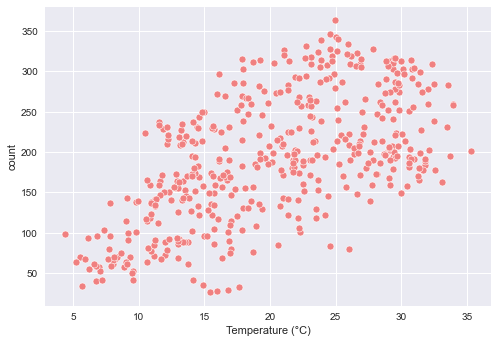

In [79]:
x = df.resample('D').mean()['temp']
y = df.resample('D').mean()['count']

sns.scatterplot(x=x, y=y, color='lightcoral')

plt.xlabel('Temperature (°C)')

plt.savefig('./output/temperature_count.jpg')